In [11]:
%matplotlib inline
import pandas as pd
from pylab import rcParams
from matplotlib import pyplot as plt

In [3]:
fig_width, fig_height = 16, 8
rcParams['figure.figsize'] = fig_width, fig_height

In [22]:
def __my_flatten_cols(self, how="_".join, reset_index=True):
    how = (lambda iter: list(iter)[-1]) if how == "last" else how
    self.columns = [how(filter(None, map(str, levels))) for levels in self.columns.values] \
                    if isinstance(self.columns, pd.MultiIndex) else self.columns
    return self.reset_index() if reset_index else self
pd.DataFrame.my_flatten_cols = __my_flatten_cols

In [1]:
def load_dataset(name):
    df = pd.read_csv(f'metrics_{name}.csv')
    return df

## Tournament selection vs truncation selection (best n)

In [18]:
def selection_analysis():
    todf = load_dataset('queens_tournament_5i')
    todf['type'] = 'tournament'
    trdf = load_dataset('queens_trunc_5i')
    trdf['type'] = 'truncation'
    
    islands = [0, 1, 2, 3, 4]
    nrows =  len(islands)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(fig_width * 1.3, fig_height * nrows))
    fig.suptitle('Tournament vs truncation selection', fontsize=16)
    fig.subplots_adjust(top=.965)
    
    for i in islands:
        todf[todf.islandId == i].plot(x='iteration', y=['best', 'mean'], ax=ax[i, 0], title=f'Tournament: island {i}')
        trdf[trdf.islandId == i].plot(x='iteration', y=['best', 'mean'], ax=ax[i, 1], title=f'Truncation: island {i}')

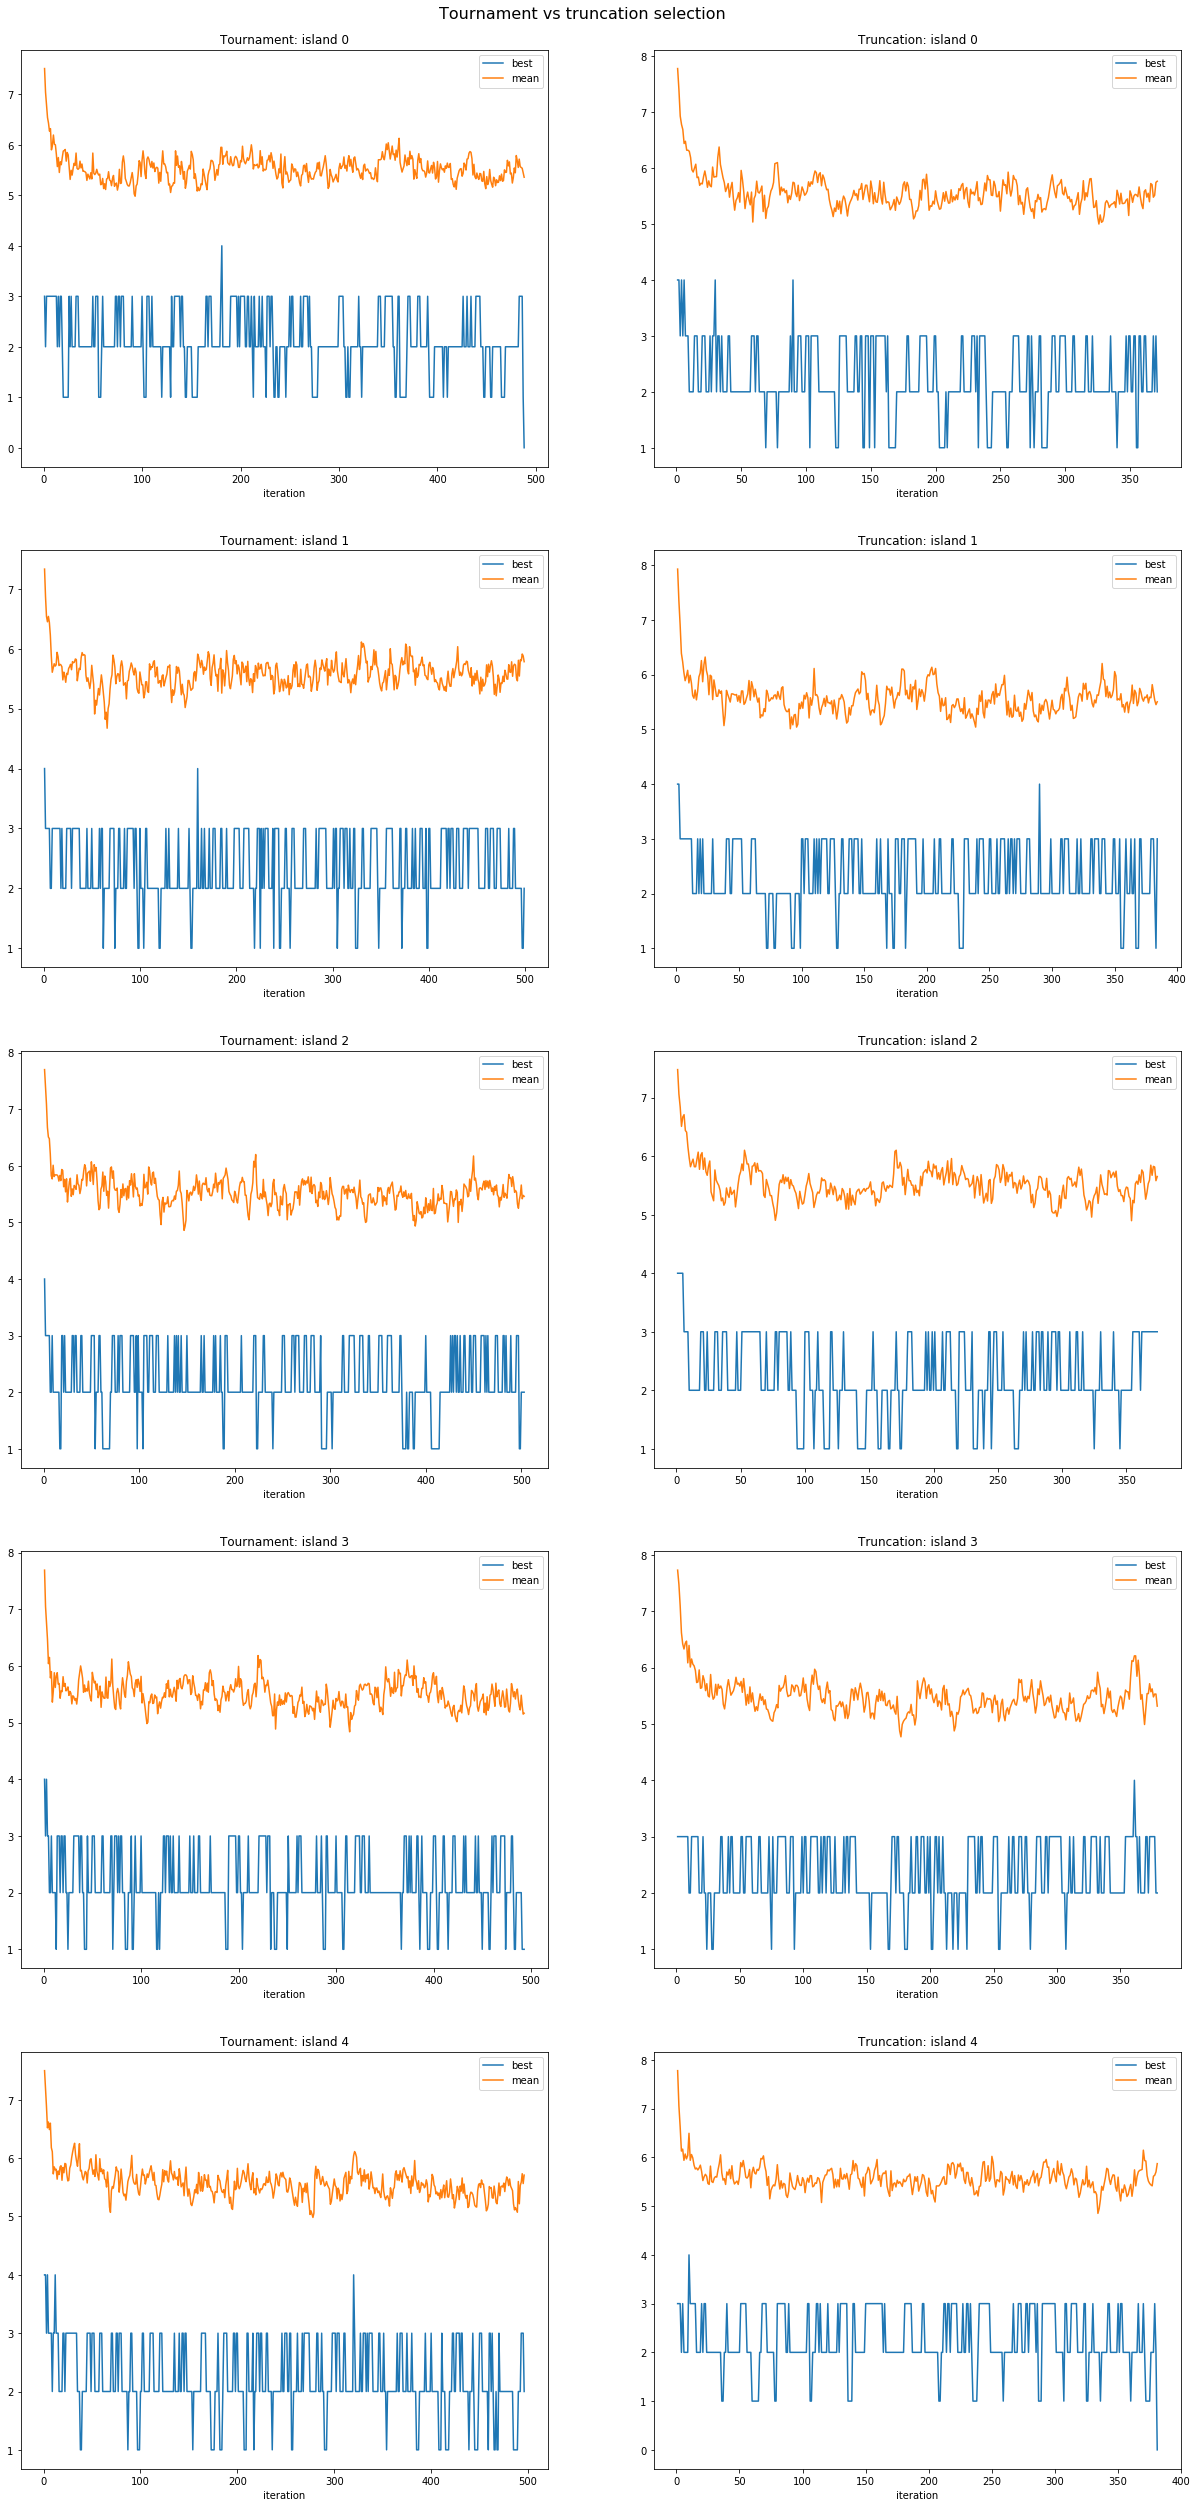

In [19]:
selection_analysis()

## Different island counts

In [58]:
def island_count_analysis():
    totalIslandCounts = [1, 3, 5, 10, 20]
    dfs = []
    for i in totalIslandCounts:
        df = load_dataset(f'queens_tournament_{i}i')
        df = df[['iteration', 'best', 'mean']]
        df = df.groupby(['iteration']).agg(['min', 'mean']).my_flatten_cols()
        df = df[['iteration', 'best_min', 'mean_mean']]
        df['totalIslandCount'] = i
        
        dfs.append(df)
    
    df = pd.concat(dfs)
    
    nrows = len(totalIslandCounts)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(fig_width, fig_height * nrows))
    fig.suptitle('Different island counts', fontsize=16)
    fig.subplots_adjust(top=.965)
    
    for i, isl in enumerate(totalIslandCounts):
        xdf = df[df.totalIslandCount == isl]
        
        xdf.plot(x='iteration', y='best_min', ax=ax[i, 0], title=f'Best solution: island {isl}')
        xdf.plot(x='iteration', y='mean_mean', ax=ax[i, 1], title=f'Mean solution: island {isl}')

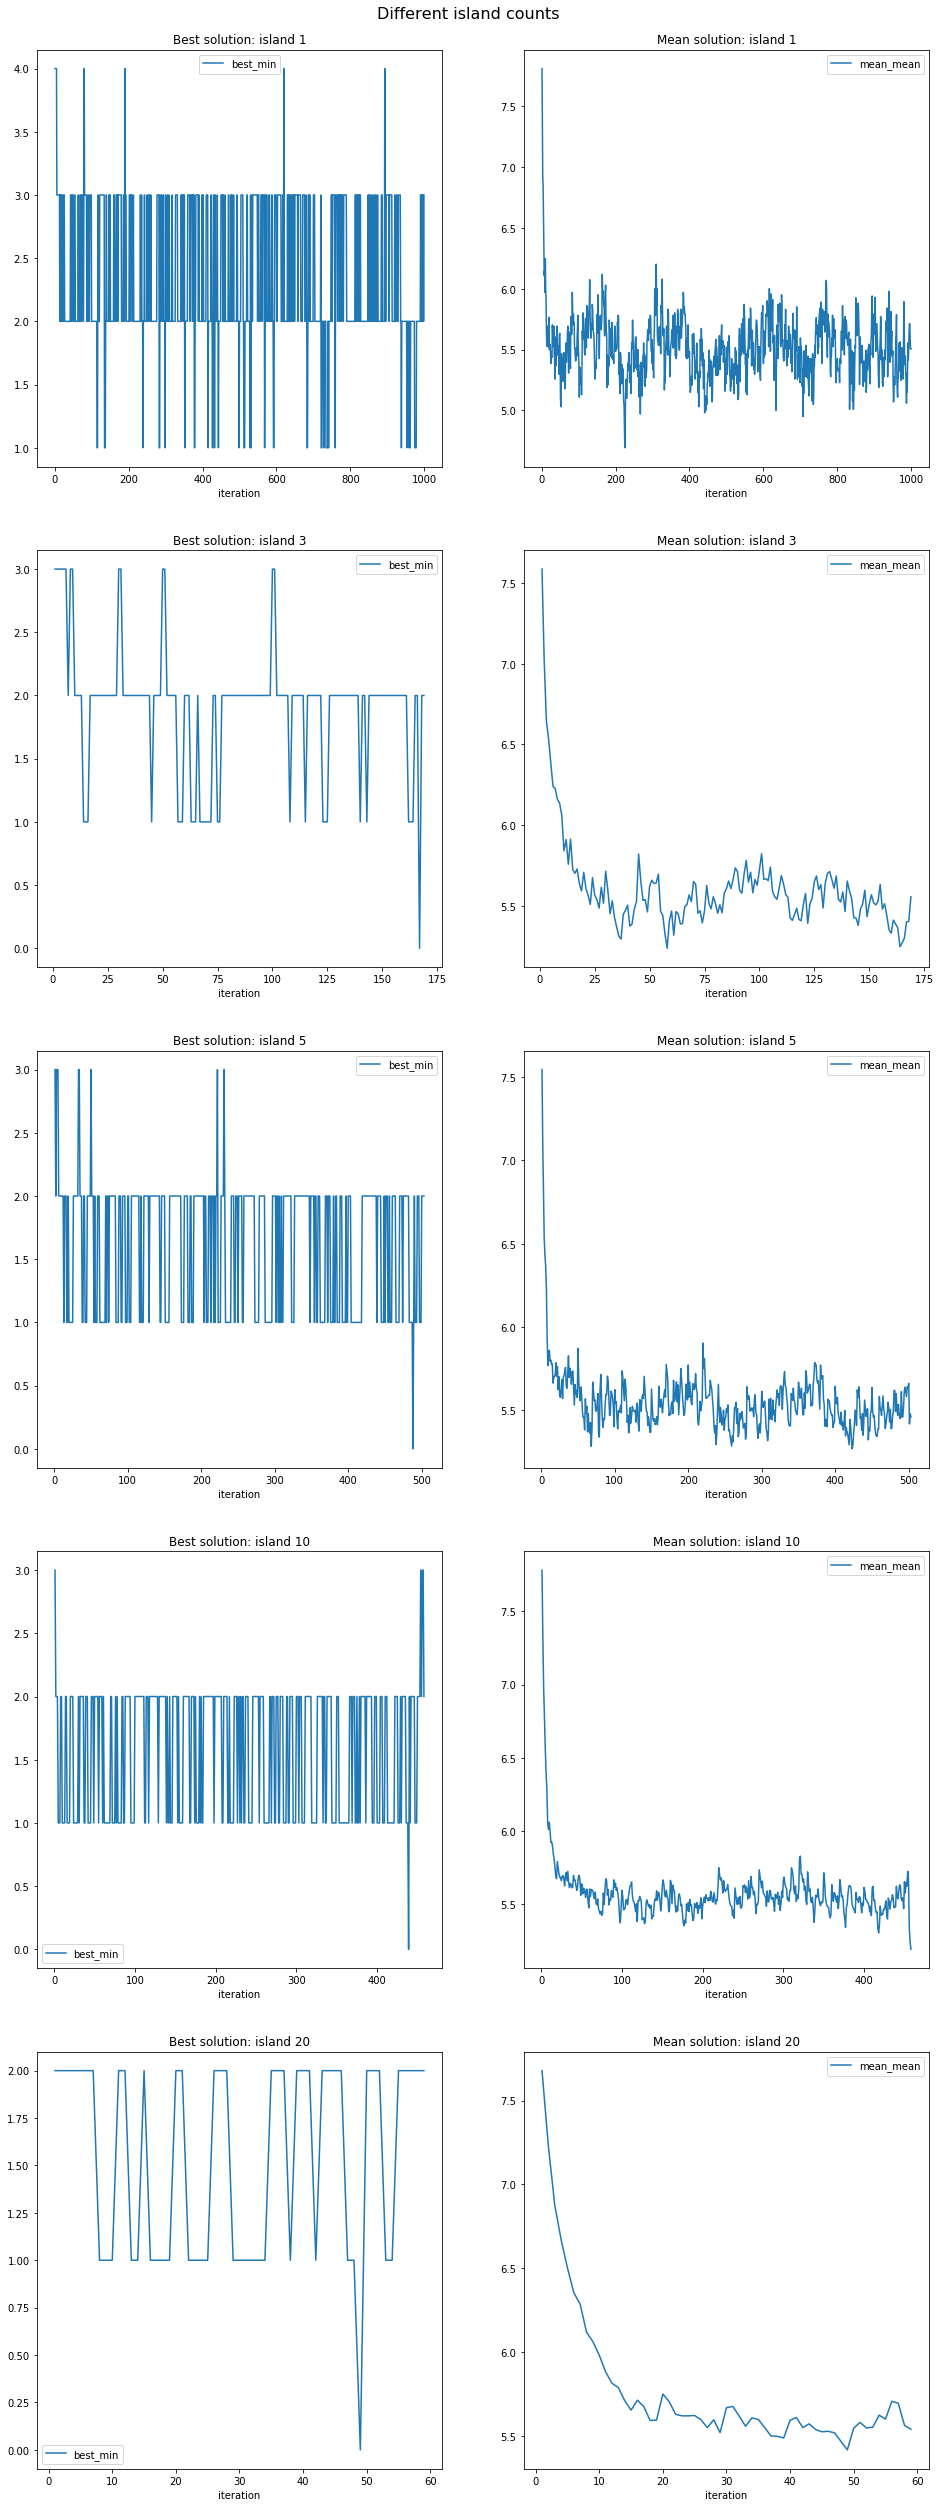

In [59]:
island_count_analysis()

## Random vs truncation (best n) reproduction

In [50]:
def reproduction_analysis():
    tdf = load_dataset('onemax_truncrepr')
    tdf['type'] = 'trunc'
    rdf = load_dataset('onemax_randrepr')
    rdf['type'] = 'rand'
    
    islands = [0, 1, 2, 3, 4]
    nrows =  len(islands)
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(fig_width * 1.3, fig_height * nrows))
    fig.suptitle('Tournament vs truncation selection', fontsize=16)
    fig.subplots_adjust(top=.965)
    
    for i in islands:
        tdf[tdf.islandId == i].plot(x='iteration', y=['best', 'mean'], ax=ax[i, 0], title=f'Trunc reproduction selection: island {i}')
        rdf[rdf.islandId == i].plot(x='iteration', y=['best', 'mean'], ax=ax[i, 1], title=f'Random reporoduction selection: island {i}')

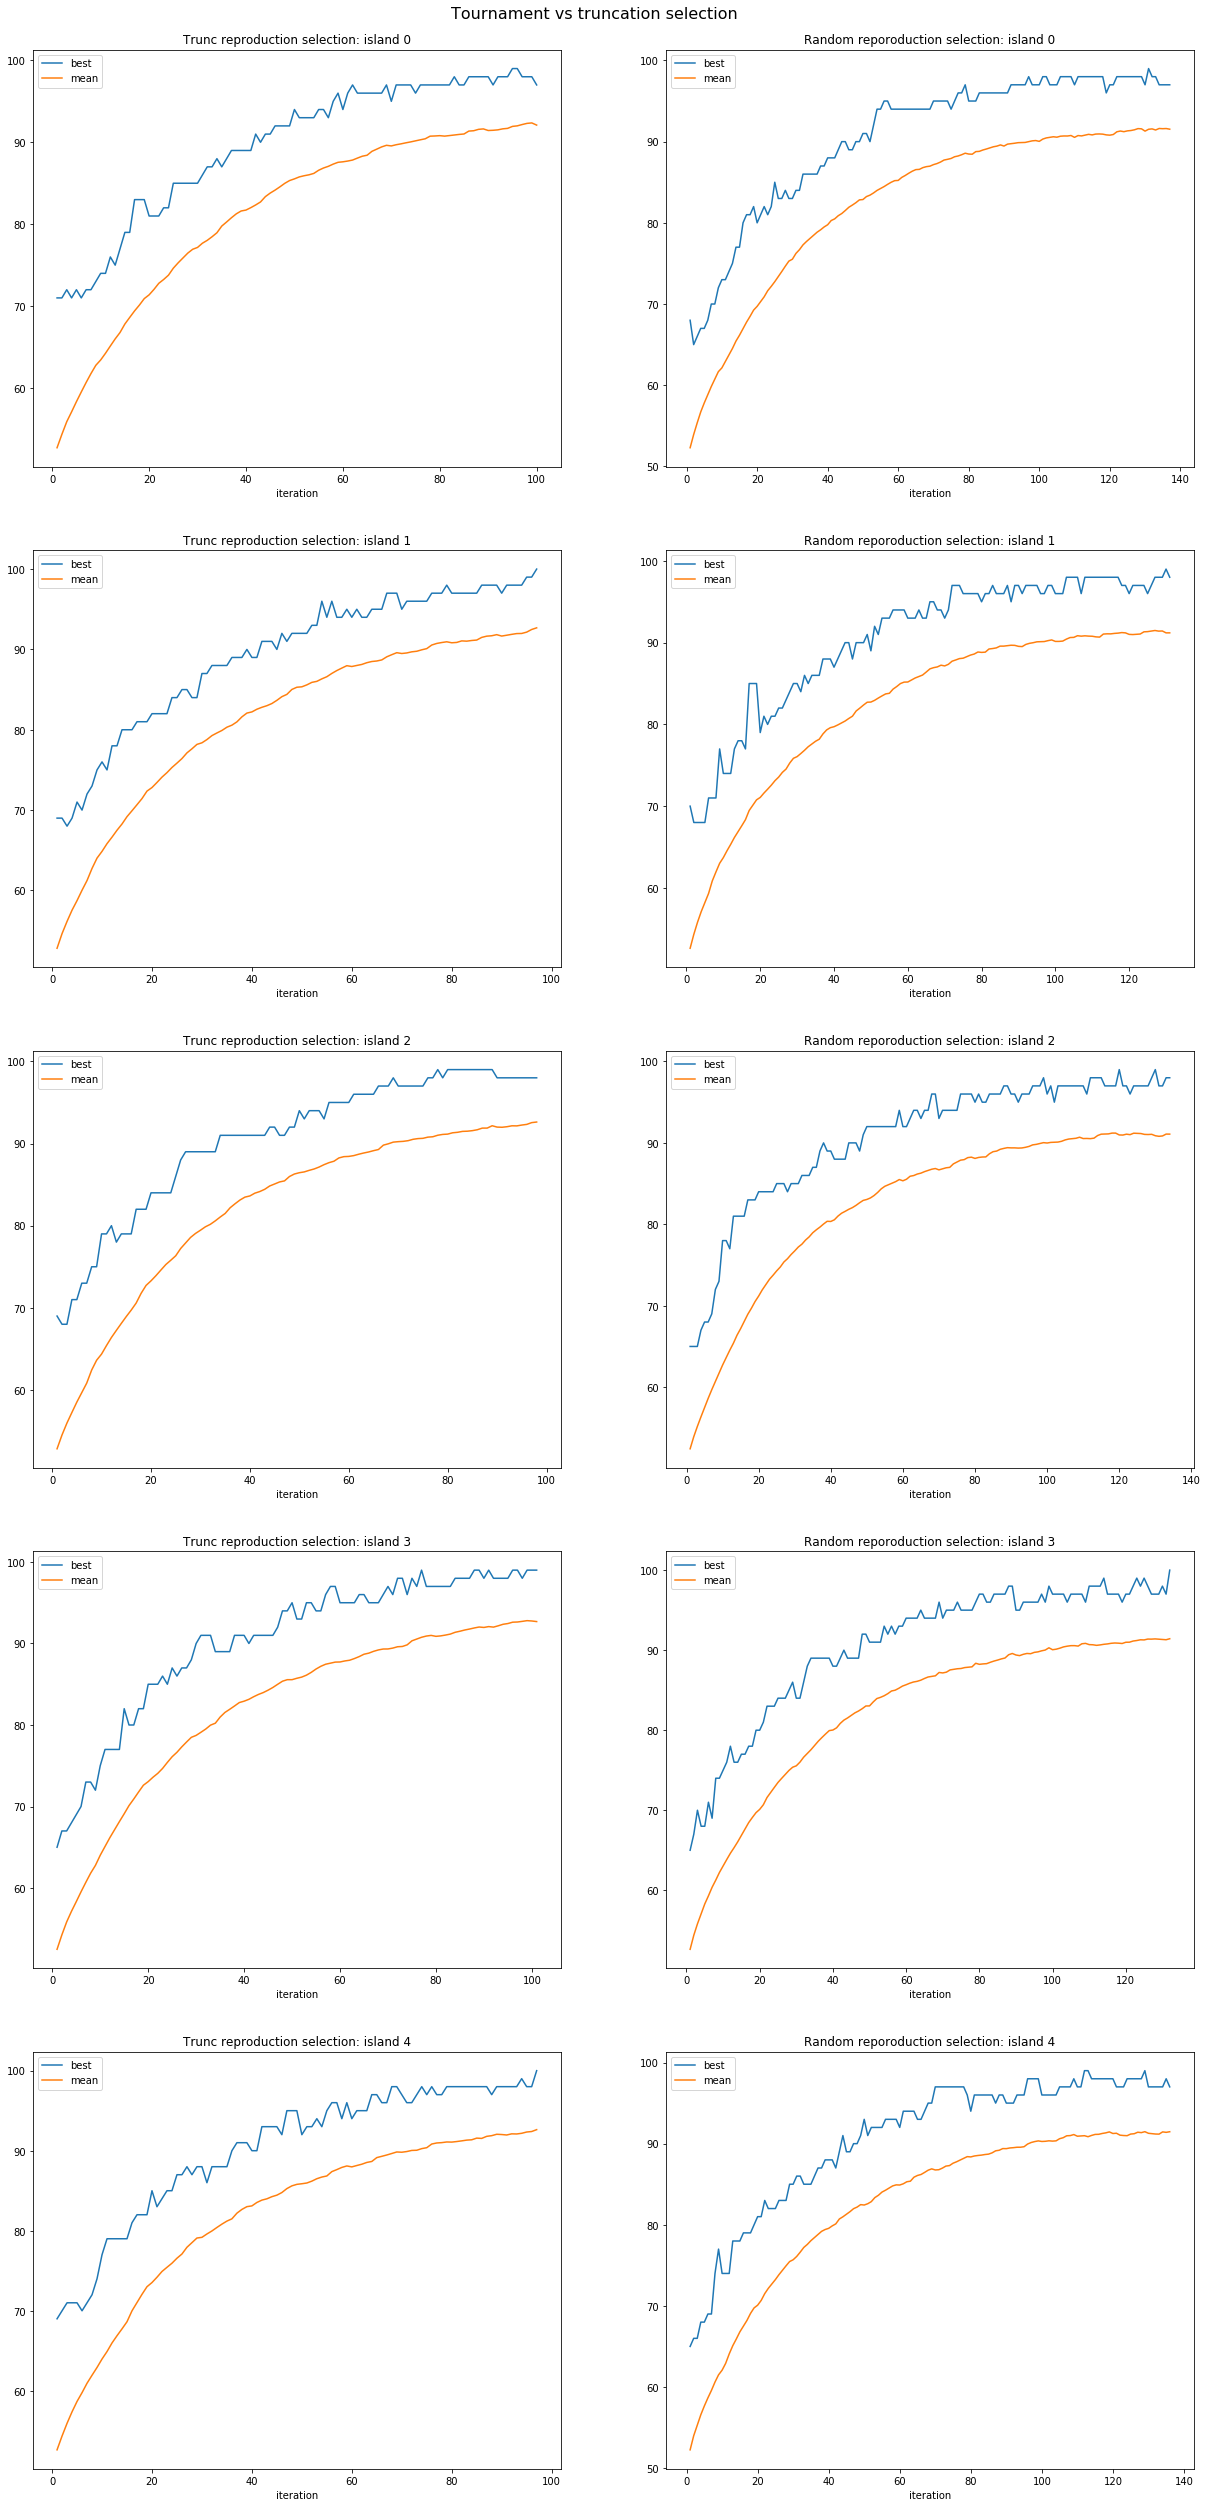

In [51]:
reproduction_analysis()